In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import random
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import math

In [3]:
Train_Data = pd.read_csv('Encoded_Train_Data.csv')
Val_Data = pd.read_csv('Encoded_Val_Data.csv') 
Test_Data = pd.read_csv('Encoded_Test_Data.csv') 

In [4]:
Train_Data.columns


Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Educational_Level',
       'Income', 'Expected_checkin', 'Expected_checkout', 'Booking_date',
       'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Country_region_East',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel',
       'Hotel_Type_Resort', 'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Days_plan_to_stay', 'checkin_year',
       'checkin_month', 'checkin_day', 'checkin_day_of_the_week',
       'Days_until_checkin', 'Booking_month', 'Booking_day_of_the_week',
       'Min_num_of_rooms', 'Total_Min_Cost', 'Min_Discount_amo

In [5]:
Continus = ['Age','Discount_Rate','Room_Rate','checkin_year','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms',
            'Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Label =['Reservation_Status']

In [6]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Min Value'] = list(Train_Data.min(axis=0))
    summary['Max Value'] = list(Train_Data.max(axis=0))
    return summary

resumetable(Train_Data)

Dataset Shape: (27499, 46)


,Name,dtypes,Missing,Uniques,Min Value,Max Value
0,Unnamed: 0,int64,0,27499,0,27498
1,Reservation-id,int64,0,27495,3154,99999005
2,Gender,int64,0,2,0,1
3,Age,int64,0,53,18,70
4,Educational_Level,int64,0,4,0,3
5,Income,int64,0,4,0,3
6,Expected_checkin,object,0,901,2014-11-18,2017-09-06
7,Expected_checkout,object,0,929,2014-11-22,2017-09-09
8,Booking_date,object,0,1133,2014-01-09,2017-08-30
9,Adults,int64,0,5,1,5


In [129]:
Weights_col=Y_train.copy()
Weights_col = Weights_col.replace(1, 0.6)
Weights_col = Weights_col.replace(2, 2.9)
Weights_col = Weights_col.replace(3, 5.9)

In [136]:
import xgboost as xgb

Continus = ['Age','Discount_Rate','Room_Rate','checkin_year','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Label =['Reservation_Status']

for i in range (3,10):
    for j in range (3,10):
        for k in range (3,10):
            print("==========================================================================")
            print("i=",i/10,"j=",j/2,"k=",k)
            Weights_col=Y_train.copy()
            Weights_col = Weights_col.replace(1, i/10)
            Weights_col = Weights_col.replace(2, j/2)
            Weights_col = Weights_col.replace(3, k)

            Classifier = xgb.XGBClassifier(random_state=1,learning_rate=0.06,eval_metric = "merror",
                                           max_depth=8)

            X_train = Train_Data.loc[:,Categorical+Continus]
            Y_train = Train_Data.loc[:,Label]

            Classifier.fit(X_train, Y_train,sample_weight=Weights_col)

            X_val = Val_Data.loc[:,Categorical+Continus]
            Y_val = Val_Data.loc[:,Label]

            Y_val_predict = Classifier.predict(X_val)

            # print(Classifier.score(Y_val_predict, Y_val))
#             fig=plot_confusion_matrix(Classifier, X_val,Y_val,display_labels=["Check-In","Canceled","No-Show"])
#             fig.figure_.suptitle("Confusion Matrix for Training Data")
#             plt.show()

            from sklearn.metrics import classification_report
            target_names = ["Check-In","Canceled","No-Show"]
            print(classification_report(Y_val, Y_val_predict, target_names=target_names))

i= 0.3 j= 1.5 k= 3
              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.60      1610
    Canceled       0.27      0.21      0.24       741
     No-Show       0.16      0.20      0.18       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.45      0.44      2749

i= 0.3 j= 1.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.58      0.56      0.57      1610
    Canceled       0.28      0.12      0.17       741
     No-Show       0.15      0.33      0.21       398

    accuracy                           0.41      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.41      0.41      2749

i= 0.3 j= 1.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.30      0.07      0.11       741
     No-Show       0.15      0.41      0.22       398

    accuracy                           0.40      2749
   macro avg       0.35      0.34      0.30      2749
weighted avg       0.45      0.40      0.40      2749

i= 0.3 j= 1.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.50      0.54      1610
    Canceled       0.33      0.06      0.10       741
     No-Show       0.15      0.47      0.23       398

    accuracy                           0.38      2749
   macro avg       0.36      0.34      0.29      2749
weighted avg       0.46      0.38      0.38      2749

i= 0.3 j= 1.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.37      0.05      0.09       741
     No-Show       0.15      0.52      0.23       398

    accuracy                           0.36      2749
   macro avg       0.37      0.34      0.28      2749
weighted avg       0.47      0.36      0.36      2749

i= 0.3 j= 1.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.28      0.03      0.06       741
     No-Show       0.14      0.52      0.23       398

    accuracy                           0.35      2749
   macro avg       0.34      0.34      0.27      2749
weighted avg       0.45      0.35      0.35      2749

i= 0.3 j= 1.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.41      0.49      1610
    Canceled       0.32      0.04      0.07       741
     No-Show       0.14      0.57      0.23       398

    accuracy                           0.33      2749
   macro avg       0.35      0.34      0.26      2749
weighted avg       0.46      0.33      0.34      2749

i= 0.3 j= 2.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.28      0.39      0.33       741
     No-Show       0.20      0.11      0.14       398

    accuracy                           0.45      2749
   macro avg       0.36      0.35      0.35      2749
weighted avg       0.45      0.45      0.45      2749

i= 0.3 j= 2.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.28      0.25      0.27       741
     No-Show       0.15      0.23      0.18       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.42      0.43      2749

i= 0.3 j= 2.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.49      0.54      1610
    Canceled       0.28      0.18      0.22       741
     No-Show       0.15      0.35      0.21       398

    accuracy                           0.39      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.45      0.39      0.40      2749

i= 0.3 j= 2.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.43      0.50      1610
    Canceled       0.28      0.12      0.17       741
     No-Show       0.15      0.47      0.23       398

    accuracy                           0.35      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.45      0.35      0.37      2749

i= 0.3 j= 2.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.42      0.49      1610
    Canceled       0.31      0.10      0.15       741
     No-Show       0.15      0.52      0.23       398

    accuracy                           0.35      2749
   macro avg       0.35      0.35      0.29      2749
weighted avg       0.45      0.35      0.36      2749

i= 0.3 j= 2.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.39      0.47      1610
    Canceled       0.30      0.08      0.12       741
     No-Show       0.15      0.55      0.23       398

    accuracy                           0.33      2749
   macro avg       0.35      0.34      0.28      2749
weighted avg       0.45      0.33      0.34      2749

i= 0.3 j= 2.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.36      0.45      1610
    Canceled       0.28      0.07      0.11       741
     No-Show       0.15      0.61      0.24       398

    accuracy                           0.32      2749
   macro avg       0.35      0.35      0.27      2749
weighted avg       0.45      0.32      0.33      2749

i= 0.3 j= 2.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.51      0.55      1610
    Canceled       0.28      0.48      0.35       741
     No-Show       0.17      0.05      0.07       398

    accuracy                           0.43      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.43      0.43      2749

i= 0.3 j= 2.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.48      0.53      1610
    Canceled       0.28      0.41      0.33       741
     No-Show       0.15      0.14      0.14       398

    accuracy                           0.41      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.41      0.42      2749

i= 0.3 j= 2.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.43      0.50      1610
    Canceled       0.29      0.33      0.31       741
     No-Show       0.15      0.28      0.20       398

    accuracy                           0.38      2749
   macro avg       0.34      0.35      0.34      2749
weighted avg       0.45      0.38      0.40      2749

i= 0.3 j= 2.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.42      0.49      1610
    Canceled       0.28      0.23      0.25       741
     No-Show       0.15      0.37      0.21       398

    accuracy                           0.36      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.36      0.38      2749

i= 0.3 j= 2.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.40      0.48      1610
    Canceled       0.27      0.16      0.20       741
     No-Show       0.15      0.47      0.23       398

    accuracy                           0.34      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.45      0.34      0.37      2749

i= 0.3 j= 2.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.38      0.47      1610
    Canceled       0.29      0.14      0.19       741
     No-Show       0.15      0.52      0.23       398

    accuracy                           0.34      2749
   macro avg       0.35      0.35      0.30      2749
weighted avg       0.45      0.34      0.36      2749

i= 0.3 j= 2.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.36      0.45      1610
    Canceled       0.31      0.13      0.18       741
     No-Show       0.15      0.56      0.24       398

    accuracy                           0.33      2749
   macro avg       0.35      0.35      0.29      2749
weighted avg       0.46      0.33      0.35      2749

i= 0.3 j= 3.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.45      0.52      1610
    Canceled       0.28      0.56      0.37       741
     No-Show       0.11      0.02      0.03       398

    accuracy                           0.42      2749
   macro avg       0.33      0.34      0.31      2749
weighted avg       0.45      0.42      0.41      2749

i= 0.3 j= 3.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.38      0.47      1610
    Canceled       0.28      0.62      0.38       741
     No-Show       0.18      0.04      0.06       398

    accuracy                           0.40      2749
   macro avg       0.36      0.35      0.30      2749
weighted avg       0.46      0.40      0.39      2749

i= 0.3 j= 3.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.32      0.42      1610
    Canceled       0.28      0.66      0.39       741
     No-Show       0.19      0.06      0.09       398

    accuracy                           0.38      2749
   macro avg       0.36      0.35      0.30      2749
weighted avg       0.46      0.38      0.36      2749

i= 0.3 j= 3.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.30      0.40      1610
    Canceled       0.28      0.69      0.39       741
     No-Show       0.16      0.05      0.08       398

    accuracy                           0.37      2749
   macro avg       0.35      0.34      0.29      2749
weighted avg       0.46      0.37      0.35      2749

i= 0.3 j= 3.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.27      0.37      1610
    Canceled       0.27      0.70      0.40       741
     No-Show       0.12      0.04      0.06       398

    accuracy                           0.35      2749
   macro avg       0.33      0.34      0.28      2749
weighted avg       0.45      0.35      0.33      2749

i= 0.3 j= 3.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.62      0.27      0.37      1610
    Canceled       0.28      0.70      0.40       741
     No-Show       0.18      0.09      0.11       398

    accuracy                           0.36      2749
   macro avg       0.36      0.35      0.29      2749
weighted avg       0.46      0.36      0.34      2749

i= 0.3 j= 3.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.63      0.24      0.34      1610
    Canceled       0.28      0.75      0.41       741
     No-Show       0.16      0.06      0.09       398

    accuracy                           0.35      2749
   macro avg       0.36      0.35      0.28      2749
weighted avg       0.47      0.35      0.32      2749

i= 0.3 j= 3.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.41      0.49      1610
    Canceled       0.28      0.62      0.39       741
     No-Show       0.21      0.02      0.03       398

    accuracy                           0.41      2749
   macro avg       0.37      0.35      0.30      2749
weighted avg       0.46      0.41      0.40      2749

i= 0.3 j= 3.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.38      0.47      1610
    Canceled       0.28      0.60      0.38       741
     No-Show       0.16      0.05      0.08       398

    accuracy                           0.39      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.45      0.39      0.39      2749

i= 0.3 j= 3.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.40      0.48      1610
    Canceled       0.29      0.53      0.37       741
     No-Show       0.17      0.13      0.15       398

    accuracy                           0.40      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.40      0.40      2749

i= 0.3 j= 3.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.39      0.47      1610
    Canceled       0.28      0.45      0.35       741
     No-Show       0.16      0.21      0.18       398

    accuracy                           0.38      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.38      0.40      2749

i= 0.3 j= 3.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.38      0.47      1610
    Canceled       0.28      0.34      0.31       741
     No-Show       0.15      0.31      0.20       398

    accuracy                           0.36      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.36      0.39      2749

i= 0.3 j= 3.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.35      0.44      1610
    Canceled       0.28      0.27      0.27       741
     No-Show       0.15      0.43      0.23       398

    accuracy                           0.34      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.46      0.34      0.36      2749

i= 0.3 j= 3.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.32      0.42      1610
    Canceled       0.29      0.22      0.25       741
     No-Show       0.15      0.50      0.23       398

    accuracy                           0.32      2749
   macro avg       0.35      0.35      0.30      2749
weighted avg       0.46      0.32      0.35      2749

i= 0.3 j= 4.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.40      0.48      1610
    Canceled       0.28      0.63      0.39       741
     No-Show       0.15      0.01      0.02       398

    accuracy                           0.40      2749
   macro avg       0.35      0.35      0.30      2749
weighted avg       0.45      0.40      0.39      2749

i= 0.3 j= 4.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.38      0.47      1610
    Canceled       0.28      0.62      0.38       741
     No-Show       0.18      0.04      0.06       398

    accuracy                           0.40      2749
   macro avg       0.36      0.35      0.30      2749
weighted avg       0.46      0.40      0.39      2749

i= 0.3 j= 4.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.35      0.44      1610
    Canceled       0.28      0.60      0.38       741
     No-Show       0.17      0.10      0.12       398

    accuracy                           0.38      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.46      0.38      0.38      2749

i= 0.3 j= 4.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.37      0.46      1610
    Canceled       0.28      0.49      0.36       741
     No-Show       0.17      0.20      0.18       398

    accuracy                           0.38      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.38      0.39      2749

i= 0.3 j= 4.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.35      0.44      1610
    Canceled       0.28      0.46      0.35       741
     No-Show       0.16      0.23      0.19       398

    accuracy                           0.36      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.36      0.38      2749

i= 0.3 j= 4.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.34      0.44      1610
    Canceled       0.28      0.36      0.32       741
     No-Show       0.16      0.35      0.22       398

    accuracy                           0.35      2749
   macro avg       0.35      0.35      0.32      2749
weighted avg       0.46      0.35      0.37      2749

i= 0.3 j= 4.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.32      0.42      1610
    Canceled       0.27      0.25      0.26       741
     No-Show       0.15      0.44      0.22       398

    accuracy                           0.32      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.45      0.32      0.35      2749

i= 0.3 j= 4.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.36      0.45      1610
    Canceled       0.28      0.67      0.39       741
     No-Show       0.05      0.00      0.00       398

    accuracy                           0.39      2749
   macro avg       0.31      0.34      0.28      2749
weighted avg       0.44      0.39      0.37      2749

i= 0.3 j= 4.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.37      0.46      1610
    Canceled       0.28      0.64      0.39       741
     No-Show       0.18      0.03      0.05       398

    accuracy                           0.39      2749
   macro avg       0.36      0.34      0.30      2749
weighted avg       0.46      0.39      0.38      2749

i= 0.3 j= 4.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.35      0.44      1610
    Canceled       0.28      0.65      0.39       741
     No-Show       0.19      0.06      0.09       398

    accuracy                           0.39      2749
   macro avg       0.36      0.35      0.31      2749
weighted avg       0.46      0.39      0.38      2749

i= 0.3 j= 4.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.34      0.43      1610
    Canceled       0.28      0.59      0.38       741
     No-Show       0.19      0.15      0.16       398

    accuracy                           0.38      2749
   macro avg       0.36      0.36      0.33      2749
weighted avg       0.46      0.38      0.38      2749

i= 0.3 j= 4.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.33      0.43      1610
    Canceled       0.28      0.55      0.37       741
     No-Show       0.15      0.17      0.16       398

    accuracy                           0.36      2749
   macro avg       0.35      0.35      0.32      2749
weighted avg       0.45      0.36      0.37      2749

i= 0.3 j= 4.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.34      0.44      1610
    Canceled       0.28      0.44      0.34       741
     No-Show       0.17      0.30      0.22       398

    accuracy                           0.36      2749
   macro avg       0.35      0.36      0.33      2749
weighted avg       0.46      0.36      0.38      2749

i= 0.3 j= 4.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.33      0.43      1610
    Canceled       0.28      0.32      0.30       741
     No-Show       0.16      0.41      0.23       398

    accuracy                           0.34      2749
   macro avg       0.35      0.35      0.32      2749
weighted avg       0.46      0.34      0.37      2749

i= 0.4 j= 1.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.65      1610
    Canceled       0.27      0.17      0.21       741
     No-Show       0.18      0.16      0.17       398

    accuracy                           0.48      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.48      0.46      2749

i= 0.4 j= 1.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.27      0.10      0.14       741
     No-Show       0.16      0.27      0.20       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.46      0.44      2749

i= 0.4 j= 1.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.27      0.06      0.09       741
     No-Show       0.15      0.33      0.21       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.44      0.43      0.41      2749

i= 0.4 j= 1.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.58      0.58      1610
    Canceled       0.31      0.04      0.07       741
     No-Show       0.15      0.39      0.21       398

    accuracy                           0.41      2749
   macro avg       0.35      0.34      0.29      2749
weighted avg       0.45      0.41      0.39      2749

i= 0.4 j= 1.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.56      0.58      1610
    Canceled       0.31      0.04      0.06       741
     No-Show       0.14      0.42      0.22       398

    accuracy                           0.40      2749
   macro avg       0.35      0.34      0.29      2749
weighted avg       0.45      0.40      0.39      2749

i= 0.4 j= 1.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.54      0.57      1610
    Canceled       0.30      0.02      0.04       741
     No-Show       0.15      0.45      0.22       398

    accuracy                           0.39      2749
   macro avg       0.35      0.34      0.28      2749
weighted avg       0.45      0.39      0.38      2749

i= 0.4 j= 1.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.50      0.54      1610
    Canceled       0.34      0.02      0.04       741
     No-Show       0.14      0.47      0.22       398

    accuracy                           0.37      2749
   macro avg       0.36      0.33      0.27      2749
weighted avg       0.46      0.37      0.36      2749

i= 0.4 j= 2.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.27      0.30      0.29       741
     No-Show       0.16      0.08      0.11       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.46      0.45      2749

i= 0.4 j= 2.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.60      0.59      1610
    Canceled       0.27      0.21      0.23       741
     No-Show       0.15      0.20      0.17       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.44      0.44      2749

i= 0.4 j= 2.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.59      0.59      1610
    Canceled       0.30      0.14      0.19       741
     No-Show       0.14      0.27      0.18       398

    accuracy                           0.42      2749
   macro avg       0.34      0.33      0.32      2749
weighted avg       0.44      0.42      0.42      2749

i= 0.4 j= 2.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.28      0.09      0.13       741
     No-Show       0.15      0.38      0.22       398

    accuracy                           0.40      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.40      0.40      2749

i= 0.4 j= 2.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.51      0.55      1610
    Canceled       0.27      0.06      0.10       741
     No-Show       0.14      0.43      0.22       398

    accuracy                           0.38      2749
   macro avg       0.33      0.33      0.29      2749
weighted avg       0.44      0.38      0.38      2749

i= 0.4 j= 2.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.50      0.54      1610
    Canceled       0.32      0.05      0.08       741
     No-Show       0.15      0.48      0.22       398

    accuracy                           0.37      2749
   macro avg       0.35      0.34      0.28      2749
weighted avg       0.46      0.37      0.37      2749

i= 0.4 j= 2.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.48      0.54      1610
    Canceled       0.31      0.05      0.08       741
     No-Show       0.15      0.50      0.23       398

    accuracy                           0.37      2749
   macro avg       0.35      0.34      0.28      2749
weighted avg       0.46      0.37      0.37      2749

i= 0.4 j= 2.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.59      0.59      1610
    Canceled       0.28      0.40      0.33       741
     No-Show       0.19      0.04      0.06       398

    accuracy                           0.46      2749
   macro avg       0.35      0.34      0.33      2749
weighted avg       0.45      0.46      0.44      2749

i= 0.4 j= 2.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.58      0.59      1610
    Canceled       0.29      0.34      0.31       741
     No-Show       0.17      0.12      0.14       398

    accuracy                           0.45      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.45      0.45      2749

i= 0.4 j= 2.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.29      0.26      0.27       741
     No-Show       0.14      0.21      0.17       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.42      0.43      2749

i= 0.4 j= 2.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.52      0.55      1610
    Canceled       0.28      0.18      0.22       741
     No-Show       0.14      0.31      0.20       398

    accuracy                           0.40      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.40      0.41      2749

i= 0.4 j= 2.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.47      0.53      1610
    Canceled       0.27      0.12      0.17       741
     No-Show       0.14      0.40      0.21       398

    accuracy                           0.37      2749
   macro avg       0.33      0.33      0.30      2749
weighted avg       0.44      0.37      0.38      2749

i= 0.4 j= 2.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.47      0.53      1610
    Canceled       0.30      0.12      0.17       741
     No-Show       0.15      0.44      0.23       398

    accuracy                           0.37      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.45      0.37      0.39      2749

i= 0.4 j= 2.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.43      0.50      1610
    Canceled       0.29      0.09      0.13       741
     No-Show       0.15      0.51      0.23       398

    accuracy                           0.35      2749
   macro avg       0.34      0.34      0.29      2749
weighted avg       0.45      0.35      0.36      2749

i= 0.4 j= 3.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.56      0.58      1610
    Canceled       0.28      0.47      0.35       741
     No-Show       0.21      0.02      0.03       398

    accuracy                           0.45      2749
   macro avg       0.37      0.35      0.32      2749
weighted avg       0.46      0.45      0.44      2749

i= 0.4 j= 3.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.28      0.55      0.37       741
     No-Show       0.16      0.03      0.04       398

    accuracy                           0.42      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.42      0.41      2749

i= 0.4 j= 3.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.39      0.47      1610
    Canceled       0.28      0.62      0.38       741
     No-Show       0.16      0.03      0.04       398

    accuracy                           0.40      2749
   macro avg       0.35      0.35      0.30      2749
weighted avg       0.45      0.40      0.39      2749

i= 0.4 j= 3.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.36      0.45      1610
    Canceled       0.28      0.65      0.39       741
     No-Show       0.21      0.05      0.08       398

    accuracy                           0.39      2749
   macro avg       0.37      0.35      0.31      2749
weighted avg       0.47      0.39      0.38      2749

i= 0.4 j= 3.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.33      0.43      1610
    Canceled       0.28      0.67      0.40       741
     No-Show       0.14      0.04      0.06       398

    accuracy                           0.38      2749
   macro avg       0.34      0.35      0.30      2749
weighted avg       0.46      0.38      0.37      2749

i= 0.4 j= 3.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.31      0.41      1610
    Canceled       0.28      0.67      0.39       741
     No-Show       0.17      0.05      0.08       398

    accuracy                           0.37      2749
   macro avg       0.35      0.35      0.29      2749
weighted avg       0.46      0.37      0.36      2749

i= 0.4 j= 3.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.29      0.39      1610
    Canceled       0.28      0.69      0.40       741
     No-Show       0.12      0.04      0.06       398

    accuracy                           0.36      2749
   macro avg       0.34      0.34      0.28      2749
weighted avg       0.45      0.36      0.35      2749

i= 0.4 j= 3.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.50      0.55      1610
    Canceled       0.28      0.52      0.37       741
     No-Show       0.26      0.02      0.04       398

    accuracy                           0.44      2749
   macro avg       0.38      0.35      0.32      2749
weighted avg       0.47      0.44      0.43      2749

i= 0.4 j= 3.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.49      0.54      1610
    Canceled       0.28      0.51      0.36       741
     No-Show       0.21      0.05      0.08       398

    accuracy                           0.43      2749
   macro avg       0.36      0.35      0.33      2749
weighted avg       0.46      0.43      0.43      2749

i= 0.4 j= 3.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.49      0.54      1610
    Canceled       0.28      0.44      0.34       741
     No-Show       0.16      0.10      0.12       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.42      0.42      2749

i= 0.4 j= 3.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.46      0.52      1610
    Canceled       0.28      0.40      0.33       741
     No-Show       0.16      0.18      0.17       398

    accuracy                           0.40      2749
   macro avg       0.34      0.35      0.34      2749
weighted avg       0.45      0.40      0.42      2749

i= 0.4 j= 3.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.44      0.51      1610
    Canceled       0.28      0.30      0.29       741
     No-Show       0.15      0.29      0.20       398

    accuracy                           0.38      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.38      0.40      2749

i= 0.4 j= 3.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.39      0.47      1610
    Canceled       0.29      0.28      0.29       741
     No-Show       0.15      0.37      0.21       398

    accuracy                           0.36      2749
   macro avg       0.35      0.35      0.32      2749
weighted avg       0.45      0.36      0.39      2749

i= 0.4 j= 3.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.40      0.48      1610
    Canceled       0.27      0.21      0.24       741
     No-Show       0.15      0.41      0.21       398

    accuracy                           0.35      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.45      0.35      0.37      2749

i= 0.4 j= 4.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.28      0.57      0.38       741
     No-Show       0.26      0.01      0.02       398

    accuracy                           0.42      2749
   macro avg       0.38      0.35      0.31      2749
weighted avg       0.47      0.42      0.41      2749

i= 0.4 j= 4.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.28      0.55      0.37       741
     No-Show       0.16      0.03      0.04       398

    accuracy                           0.42      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.42      0.41      2749

i= 0.4 j= 4.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.45      0.52      1610
    Canceled       0.28      0.52      0.36       741
     No-Show       0.16      0.06      0.09       398

    accuracy                           0.41      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.41      0.41      2749

i= 0.4 j= 4.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.44      0.50      1610
    Canceled       0.28      0.47      0.35       741
     No-Show       0.18      0.15      0.16       398

    accuracy                           0.40      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.40      0.41      2749

i= 0.4 j= 4.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.40      0.48      1610
    Canceled       0.28      0.41      0.34       741
     No-Show       0.16      0.24      0.19       398

    accuracy                           0.38      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.38      0.40      2749

i= 0.4 j= 4.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.42      0.49      1610
    Canceled       0.28      0.33      0.31       741
     No-Show       0.14      0.26      0.18       398

    accuracy                           0.37      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.37      0.40      2749

i= 0.4 j= 4.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.38      0.47      1610
    Canceled       0.28      0.27      0.27       741
     No-Show       0.15      0.39      0.22       398

    accuracy                           0.35      2749
   macro avg       0.35      0.35      0.32      2749
weighted avg       0.45      0.35      0.38      2749

i= 0.4 j= 4.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.41      0.49      1610
    Canceled       0.28      0.62      0.38       741
     No-Show       0.11      0.01      0.01       398

    accuracy                           0.41      2749
   macro avg       0.33      0.35      0.30      2749
weighted avg       0.45      0.41      0.39      2749

i= 0.4 j= 4.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.42      0.50      1610
    Canceled       0.28      0.60      0.38       741
     No-Show       0.14      0.02      0.03       398

    accuracy                           0.41      2749
   macro avg       0.34      0.35      0.30      2749
weighted avg       0.45      0.41      0.40      2749

i= 0.4 j= 4.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.40      0.48      1610
    Canceled       0.28      0.59      0.38       741
     No-Show       0.20      0.05      0.08       398

    accuracy                           0.40      2749
   macro avg       0.36      0.35      0.32      2749
weighted avg       0.46      0.40      0.40      2749

i= 0.4 j= 4.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.42      0.50      1610
    Canceled       0.28      0.54      0.37       741
     No-Show       0.20      0.10      0.13       398

    accuracy                           0.41      2749
   macro avg       0.36      0.35      0.33      2749
weighted avg       0.46      0.41      0.41      2749

i= 0.4 j= 4.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.39      0.48      1610
    Canceled       0.29      0.51      0.37       741
     No-Show       0.14      0.15      0.15       398

    accuracy                           0.39      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.39      0.40      2749

i= 0.4 j= 4.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.38      0.46      1610
    Canceled       0.27      0.43      0.33       741
     No-Show       0.15      0.23      0.18       398

    accuracy                           0.37      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.37      0.39      2749

i= 0.4 j= 4.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.36      0.45      1610
    Canceled       0.28      0.36      0.32       741
     No-Show       0.16      0.33      0.21       398

    accuracy                           0.36      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.36      0.38      2749

i= 0.5 j= 1.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.78      0.67      1610
    Canceled       0.27      0.12      0.17       741
     No-Show       0.17      0.12      0.14       398

    accuracy                           0.51      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.51      0.46      2749

i= 0.5 j= 1.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.72      0.65      1610
    Canceled       0.24      0.06      0.10       741
     No-Show       0.15      0.22      0.18       398

    accuracy                           0.47      2749
   macro avg       0.33      0.34      0.31      2749
weighted avg       0.43      0.47      0.43      2749

i= 0.5 j= 1.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.27      0.05      0.08       741
     No-Show       0.16      0.31      0.21       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.45      0.42      2749

i= 0.5 j= 1.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.29      0.03      0.06       741
     No-Show       0.15      0.35      0.21       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.45      0.43      0.41      2749

i= 0.5 j= 1.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.61      1610
    Canceled       0.22      0.02      0.03       741
     No-Show       0.15      0.39      0.22       398

    accuracy                           0.42      2749
   macro avg       0.32      0.34      0.29      2749
weighted avg       0.43      0.42      0.40      2749

i= 0.5 j= 1.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.59      0.59      1610
    Canceled       0.38      0.02      0.05       741
     No-Show       0.15      0.42      0.22       398

    accuracy                           0.41      2749
   macro avg       0.37      0.34      0.29      2749
weighted avg       0.47      0.41      0.39      2749

i= 0.5 j= 1.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.56      0.58      1610
    Canceled       0.34      0.02      0.04       741
     No-Show       0.14      0.43      0.22       398

    accuracy                           0.40      2749
   macro avg       0.36      0.34      0.28      2749
weighted avg       0.46      0.40      0.38      2749

i= 0.5 j= 2.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.73      0.66      1610
    Canceled       0.28      0.24      0.26       741
     No-Show       0.20      0.06      0.10       398

    accuracy                           0.50      2749
   macro avg       0.36      0.35      0.34      2749
weighted avg       0.45      0.50      0.47      2749

i= 0.5 j= 2.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.69      0.64      1610
    Canceled       0.27      0.18      0.22       741
     No-Show       0.17      0.17      0.17       398

    accuracy                           0.48      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.44      0.48      0.46      2749

i= 0.5 j= 2.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.28      0.11      0.16       741
     No-Show       0.15      0.25      0.19       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.45      0.43      2749

i= 0.5 j= 2.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.61      0.60      1610
    Canceled       0.31      0.09      0.13       741
     No-Show       0.15      0.33      0.21       398

    accuracy                           0.43      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.43      0.42      2749

i= 0.5 j= 2.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.60      0.60      1610
    Canceled       0.34      0.06      0.10       741
     No-Show       0.15      0.37      0.21       398

    accuracy                           0.42      2749
   macro avg       0.36      0.34      0.30      2749
weighted avg       0.46      0.42      0.41      2749

i= 0.5 j= 2.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.31      0.05      0.08       741
     No-Show       0.15      0.41      0.21       398

    accuracy                           0.40      2749
   macro avg       0.35      0.34      0.29      2749
weighted avg       0.45      0.40      0.39      2749

i= 0.5 j= 2.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.30      0.04      0.06       741
     No-Show       0.14      0.42      0.21       398

    accuracy                           0.39      2749
   macro avg       0.34      0.33      0.28      2749
weighted avg       0.44      0.39      0.38      2749

i= 0.5 j= 2.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.27      0.33      0.30       741
     No-Show       0.18      0.03      0.05       398

    accuracy                           0.48      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.44      0.48      0.45      2749

i= 0.5 j= 2.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.28      0.28      0.28       741
     No-Show       0.15      0.09      0.11       398

    accuracy                           0.47      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.47      0.45      2749

i= 0.5 j= 2.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.61      0.60      1610
    Canceled       0.29      0.23      0.25       741
     No-Show       0.16      0.19      0.17       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.45      0.45      2749

i= 0.5 j= 2.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.59      0.59      1610
    Canceled       0.27      0.15      0.19       741
     No-Show       0.14      0.26      0.18       398

    accuracy                           0.42      2749
   macro avg       0.33      0.33      0.32      2749
weighted avg       0.44      0.42      0.42      2749

i= 0.5 j= 2.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.58      0.58      1610
    Canceled       0.32      0.12      0.17       741
     No-Show       0.14      0.32      0.19       398

    accuracy                           0.42      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.42      0.42      2749

i= 0.5 j= 2.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.54      0.56      1610
    Canceled       0.28      0.08      0.12       741
     No-Show       0.14      0.38      0.21       398

    accuracy                           0.39      2749
   macro avg       0.34      0.33      0.30      2749
weighted avg       0.44      0.39      0.39      2749

i= 0.5 j= 2.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.52      0.56      1610
    Canceled       0.32      0.06      0.11       741
     No-Show       0.15      0.45      0.22       398

    accuracy                           0.39      2749
   macro avg       0.36      0.34      0.30      2749
weighted avg       0.46      0.39      0.39      2749

i= 0.5 j= 3.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.61      1610
    Canceled       0.27      0.38      0.32       741
     No-Show       0.28      0.02      0.03       398

    accuracy                           0.47      2749
   macro avg       0.38      0.34      0.32      2749
weighted avg       0.46      0.47      0.45      2749

i= 0.5 j= 3.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.52      0.55      1610
    Canceled       0.28      0.49      0.35       741
     No-Show       0.16      0.02      0.03       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.45      0.44      0.42      2749

i= 0.5 j= 3.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.45      0.51      1610
    Canceled       0.28      0.56      0.37       741
     No-Show       0.16      0.02      0.04       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.45      0.42      0.41      2749

i= 0.5 j= 3.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.39      0.47      1610
    Canceled       0.27      0.61      0.38       741
     No-Show       0.09      0.02      0.03       398

    accuracy                           0.39      2749
   macro avg       0.32      0.34      0.29      2749
weighted avg       0.44      0.39      0.38      2749

i= 0.5 j= 3.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.38      0.47      1610
    Canceled       0.28      0.63      0.39       741
     No-Show       0.16      0.03      0.05       398

    accuracy                           0.40      2749
   macro avg       0.35      0.35      0.30      2749
weighted avg       0.46      0.40      0.39      2749

i= 0.5 j= 3.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.35      0.45      1610
    Canceled       0.28      0.66      0.39       741
     No-Show       0.16      0.04      0.06       398

    accuracy                           0.39      2749
   macro avg       0.35      0.35      0.30      2749
weighted avg       0.46      0.39      0.38      2749

i= 0.5 j= 3.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.32      0.42      1610
    Canceled       0.28      0.66      0.39       741
     No-Show       0.19      0.06      0.09       398

    accuracy                           0.37      2749
   macro avg       0.36      0.35      0.30      2749
weighted avg       0.45      0.37      0.36      2749

i= 0.5 j= 3.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.59      0.60      1610
    Canceled       0.28      0.43      0.34       741
     No-Show       0.24      0.01      0.02       398

    accuracy                           0.47      2749
   macro avg       0.37      0.35      0.32      2749
weighted avg       0.46      0.47      0.44      2749

i= 0.5 j= 3.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.56      0.58      1610
    Canceled       0.28      0.44      0.34       741
     No-Show       0.19      0.03      0.06       398

    accuracy                           0.45      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.45      0.44      2749

i= 0.5 j= 3.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.28      0.39      0.33       741
     No-Show       0.12      0.07      0.09       398

    accuracy                           0.44      2749
   macro avg       0.33      0.34      0.33      2749
weighted avg       0.44      0.44      0.44      2749

i= 0.5 j= 3.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.53      0.56      1610
    Canceled       0.27      0.32      0.30       741
     No-Show       0.14      0.14      0.14       398

    accuracy                           0.42      2749
   macro avg       0.33      0.33      0.33      2749
weighted avg       0.44      0.42      0.43      2749

i= 0.5 j= 3.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.50      0.54      1610
    Canceled       0.28      0.26      0.27       741
     No-Show       0.15      0.26      0.19       398

    accuracy                           0.40      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.40      0.42      2749

i= 0.5 j= 3.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.53      0.56      1610
    Canceled       0.28      0.21      0.24       741
     No-Show       0.15      0.28      0.19       398

    accuracy                           0.41      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.41      0.42      2749

i= 0.5 j= 3.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.48      0.53      1610
    Canceled       0.28      0.16      0.20       741
     No-Show       0.15      0.38      0.21       398

    accuracy                           0.38      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.38      0.40      2749

i= 0.5 j= 4.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.54      0.56      1610
    Canceled       0.28      0.48      0.35       741
     No-Show       0.20      0.01      0.01       398

    accuracy                           0.44      2749
   macro avg       0.36      0.34      0.31      2749
weighted avg       0.45      0.44      0.43      2749

i= 0.5 j= 4.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.52      0.55      1610
    Canceled       0.28      0.49      0.35       741
     No-Show       0.16      0.02      0.03       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.45      0.44      0.42      2749

i= 0.5 j= 4.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.52      0.56      1610
    Canceled       0.28      0.47      0.35       741
     No-Show       0.17      0.05      0.08       398

    accuracy                           0.44      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.44      0.43      2749

i= 0.5 j= 4.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.51      0.55      1610
    Canceled       0.28      0.41      0.33       741
     No-Show       0.16      0.10      0.13       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.43      0.43      2749

i= 0.5 j= 4.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.49      0.54      1610
    Canceled       0.28      0.37      0.32       741
     No-Show       0.16      0.19      0.17       398

    accuracy                           0.41      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.41      0.42      2749

i= 0.5 j= 4.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.49      0.54      1610
    Canceled       0.28      0.27      0.27       741
     No-Show       0.15      0.27      0.19       398

    accuracy                           0.40      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.40      0.42      2749

i= 0.5 j= 4.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.29      0.26      0.27       741
     No-Show       0.15      0.33      0.21       398

    accuracy                           0.39      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.39      0.41      2749

i= 0.5 j= 4.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.50      0.54      1610
    Canceled       0.28      0.54      0.37       741
     No-Show       0.22      0.01      0.01       398

    accuracy                           0.44      2749
   macro avg       0.37      0.35      0.31      2749
weighted avg       0.46      0.44      0.42      2749

i= 0.5 j= 4.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.49      0.54      1610
    Canceled       0.28      0.54      0.37       741
     No-Show       0.21      0.02      0.03       398

    accuracy                           0.44      2749
   macro avg       0.37      0.35      0.32      2749
weighted avg       0.46      0.44      0.42      2749

i= 0.5 j= 4.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.48      0.53      1610
    Canceled       0.28      0.53      0.37       741
     No-Show       0.13      0.02      0.04       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.45      0.43      0.42      2749

i= 0.5 j= 4.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.47      0.53      1610
    Canceled       0.27      0.47      0.35       741
     No-Show       0.13      0.07      0.09       398

    accuracy                           0.41      2749
   macro avg       0.33      0.34      0.32      2749
weighted avg       0.44      0.41      0.41      2749

i= 0.5 j= 4.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.28      0.44      0.34       741
     No-Show       0.16      0.13      0.14       398

    accuracy                           0.41      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.41      0.42      2749

i= 0.5 j= 4.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.44      0.51      1610
    Canceled       0.28      0.40      0.33       741
     No-Show       0.16      0.21      0.18       398

    accuracy                           0.40      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.40      0.41      2749

i= 0.5 j= 4.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.43      0.50      1610
    Canceled       0.28      0.32      0.30       741
     No-Show       0.15      0.27      0.19       398

    accuracy                           0.38      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.38      0.40      2749

i= 0.6 j= 1.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.86      0.70      1610
    Canceled       0.25      0.07      0.11       741
     No-Show       0.18      0.09      0.12       398

    accuracy                           0.53      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.53      0.45      2749

i= 0.6 j= 1.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.80      0.68      1610
    Canceled       0.27      0.05      0.08       741
     No-Show       0.16      0.17      0.17       398

    accuracy                           0.51      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.51      0.45      2749

i= 0.6 j= 1.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.75      0.66      1610
    Canceled       0.27      0.03      0.06       741
     No-Show       0.16      0.25      0.20       398

    accuracy                           0.48      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.48      0.43      2749

i= 0.6 j= 1.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.72      0.65      1610
    Canceled       0.31      0.03      0.05       741
     No-Show       0.16      0.29      0.20       398

    accuracy                           0.47      2749
   macro avg       0.35      0.34      0.30      2749
weighted avg       0.45      0.47      0.42      2749

i= 0.6 j= 1.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.68      0.63      1610
    Canceled       0.27      0.01      0.03       741
     No-Show       0.16      0.34      0.22       398

    accuracy                           0.45      2749
   macro avg       0.34      0.35      0.29      2749
weighted avg       0.44      0.45      0.41      2749

i= 0.6 j= 1.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.66      0.62      1610
    Canceled       0.27      0.01      0.02       741
     No-Show       0.15      0.36      0.22       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.29      2749
weighted avg       0.44      0.44      0.40      2749

i= 0.6 j= 1.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.63      0.61      1610
    Canceled       0.33      0.01      0.03       741
     No-Show       0.16      0.39      0.22       398

    accuracy                           0.43      2749
   macro avg       0.36      0.35      0.29      2749
weighted avg       0.46      0.43      0.40      2749

i= 0.6 j= 2.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.78      0.67      1610
    Canceled       0.29      0.21      0.24       741
     No-Show       0.19      0.05      0.08       398

    accuracy                           0.52      2749
   macro avg       0.36      0.34      0.33      2749
weighted avg       0.45      0.52      0.47      2749

i= 0.6 j= 2.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.76      0.67      1610
    Canceled       0.28      0.14      0.19       741
     No-Show       0.18      0.14      0.16       398

    accuracy                           0.50      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.50      0.46      2749

i= 0.6 j= 2.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.28      0.09      0.14       741
     No-Show       0.16      0.23      0.19       398

    accuracy                           0.47      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.47      0.44      2749

i= 0.6 j= 2.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.66      0.62      1610
    Canceled       0.26      0.06      0.10       741
     No-Show       0.15      0.29      0.20       398

    accuracy                           0.45      2749
   macro avg       0.33      0.34      0.31      2749
weighted avg       0.44      0.45      0.42      2749

i= 0.6 j= 2.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.66      0.62      1610
    Canceled       0.29      0.04      0.08       741
     No-Show       0.15      0.32      0.21       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.45      0.45      0.42      2749

i= 0.6 j= 2.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.61      1610
    Canceled       0.29      0.04      0.06       741
     No-Show       0.15      0.36      0.21       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.29      2749
weighted avg       0.45      0.43      0.40      2749

i= 0.6 j= 2.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.59      0.59      1610
    Canceled       0.28      0.02      0.04       741
     No-Show       0.15      0.41      0.22       398

    accuracy                           0.41      2749
   macro avg       0.34      0.34      0.28      2749
weighted avg       0.44      0.41      0.39      2749

i= 0.6 j= 2.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.64      1610
    Canceled       0.27      0.27      0.27       741
     No-Show       0.21      0.02      0.04       398

    accuracy                           0.49      2749
   macro avg       0.35      0.33      0.32      2749
weighted avg       0.45      0.49      0.45      2749

i= 0.6 j= 2.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.28      0.25      0.27       741
     No-Show       0.17      0.07      0.10       398

    accuracy                           0.49      2749
   macro avg       0.35      0.34      0.34      2749
weighted avg       0.45      0.49      0.46      2749

i= 0.6 j= 2.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.68      0.63      1610
    Canceled       0.29      0.19      0.23       741
     No-Show       0.19      0.20      0.19       398

    accuracy                           0.48      2749
   macro avg       0.36      0.36      0.35      2749
weighted avg       0.45      0.48      0.46      2749

i= 0.6 j= 2.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.66      0.62      1610
    Canceled       0.29      0.14      0.19       741
     No-Show       0.16      0.25      0.20       398

    accuracy                           0.46      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.46      0.44      2749

i= 0.6 j= 2.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.27      0.09      0.14       741
     No-Show       0.16      0.31      0.21       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.44      0.43      2749

i= 0.6 j= 2.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.61      0.60      1610
    Canceled       0.30      0.06      0.10       741
     No-Show       0.15      0.36      0.22       398

    accuracy                           0.43      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.45      0.43      0.41      2749

i= 0.6 j= 2.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.57      0.58      1610
    Canceled       0.32      0.06      0.10       741
     No-Show       0.15      0.40      0.22       398

    accuracy                           0.41      2749
   macro avg       0.35      0.34      0.30      2749
weighted avg       0.46      0.41      0.40      2749

i= 0.6 j= 3.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.27      0.33      0.30       741
     No-Show       0.11      0.01      0.01       398

    accuracy                           0.48      2749
   macro avg       0.33      0.34      0.31      2749
weighted avg       0.44      0.48      0.45      2749

i= 0.6 j= 3.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.58      0.59      1610
    Canceled       0.28      0.43      0.34       741
     No-Show       0.24      0.02      0.04       398

    accuracy                           0.46      2749
   macro avg       0.37      0.34      0.32      2749
weighted avg       0.46      0.46      0.44      2749

i= 0.6 j= 3.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.52      0.56      1610
    Canceled       0.28      0.50      0.36       741
     No-Show       0.19      0.02      0.04       398

    accuracy                           0.44      2749
   macro avg       0.36      0.35      0.32      2749
weighted avg       0.45      0.44      0.43      2749

i= 0.6 j= 3.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.46      0.52      1610
    Canceled       0.28      0.56      0.37       741
     No-Show       0.13      0.02      0.03       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.45      0.42      0.41      2749

i= 0.6 j= 3.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.41      0.49      1610
    Canceled       0.28      0.61      0.38       741
     No-Show       0.22      0.03      0.06       398

    accuracy                           0.41      2749
   macro avg       0.37      0.35      0.31      2749
weighted avg       0.46      0.41      0.40      2749

i= 0.6 j= 3.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.38      0.47      1610
    Canceled       0.27      0.62      0.38       741
     No-Show       0.10      0.02      0.03       398

    accuracy                           0.39      2749
   macro avg       0.33      0.34      0.29      2749
weighted avg       0.44      0.39      0.38      2749

i= 0.6 j= 3.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.37      0.46      1610
    Canceled       0.28      0.65      0.39       741
     No-Show       0.09      0.02      0.03       398

    accuracy                           0.39      2749
   macro avg       0.33      0.34      0.29      2749
weighted avg       0.45      0.39      0.38      2749

i= 0.6 j= 3.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.28      0.38      0.32       741
     No-Show       0.09      0.00      0.00       398

    accuracy                           0.47      2749
   macro avg       0.32      0.34      0.31      2749
weighted avg       0.43      0.47      0.44      2749

i= 0.6 j= 3.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.61      0.60      1610
    Canceled       0.28      0.38      0.32       741
     No-Show       0.22      0.03      0.06       398

    accuracy                           0.47      2749
   macro avg       0.36      0.34      0.33      2749
weighted avg       0.45      0.47      0.45      2749

i= 0.6 j= 3.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.61      0.60      1610
    Canceled       0.28      0.36      0.32       741
     No-Show       0.16      0.07      0.10       398

    accuracy                           0.46      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.46      0.45      2749

i= 0.6 j= 3.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.60      0.60      1610
    Canceled       0.29      0.31      0.30       741
     No-Show       0.20      0.16      0.18       398

    accuracy                           0.46      2749
   macro avg       0.36      0.36      0.36      2749
weighted avg       0.45      0.46      0.45      2749

i= 0.6 j= 3.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.28      0.24      0.26       741
     No-Show       0.14      0.21      0.17       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.42      0.43      2749

i= 0.6 j= 3.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.27      0.18      0.22       741
     No-Show       0.15      0.29      0.20       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.42      0.42      2749

i= 0.6 j= 3.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.53      0.56      1610
    Canceled       0.28      0.15      0.20       741
     No-Show       0.15      0.33      0.20       398

    accuracy                           0.40      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.40      0.41      2749

i= 0.6 j= 4.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.60      0.60      1610
    Canceled       0.28      0.42      0.33       741
     No-Show       0.00      0.00      0.00       398

    accuracy                           0.46      2749
   macro avg       0.29      0.34      0.31      2749
weighted avg       0.42      0.46      0.44      2749

i= 0.6 j= 4.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.58      0.59      1610
    Canceled       0.28      0.43      0.34       741
     No-Show       0.24      0.02      0.04       398

    accuracy                           0.46      2749
   macro avg       0.37      0.34      0.32      2749
weighted avg       0.46      0.46      0.44      2749

i= 0.6 j= 4.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.56      0.58      1610
    Canceled       0.28      0.42      0.33       741
     No-Show       0.18      0.05      0.08       398

    accuracy                           0.45      2749
   macro avg       0.35      0.34      0.33      2749
weighted avg       0.45      0.45      0.44      2749

i= 0.6 j= 4.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.56      0.58      1610
    Canceled       0.29      0.39      0.33       741
     No-Show       0.13      0.08      0.10       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.44      0.44      2749

i= 0.6 j= 4.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.56      0.58      1610
    Canceled       0.26      0.29      0.28       741
     No-Show       0.16      0.16      0.16       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.43      0.43      2749

i= 0.6 j= 4.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.53      0.56      1610
    Canceled       0.29      0.27      0.28       741
     No-Show       0.15      0.23      0.19       398

    accuracy                           0.42      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.42      0.43      2749

i= 0.6 j= 4.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.52      0.56      1610
    Canceled       0.27      0.20      0.23       741
     No-Show       0.14      0.28      0.19       398

    accuracy                           0.40      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.40      0.42      2749

i= 0.6 j= 4.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.58      0.59      1610
    Canceled       0.28      0.44      0.34       741
     No-Show       0.00      0.00      0.00       398

    accuracy                           0.46      2749
   macro avg       0.29      0.34      0.31      2749
weighted avg       0.42      0.46      0.44      2749

i= 0.6 j= 4.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.56      0.58      1610
    Canceled       0.28      0.47      0.35       741
     No-Show       0.15      0.01      0.01       398

    accuracy                           0.45      2749
   macro avg       0.34      0.35      0.32      2749
weighted avg       0.45      0.45      0.44      2749

i= 0.6 j= 4.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.54      0.57      1610
    Canceled       0.28      0.46      0.35       741
     No-Show       0.14      0.02      0.04       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.44      0.43      2749

i= 0.6 j= 4.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.54      0.57      1610
    Canceled       0.28      0.44      0.34       741
     No-Show       0.16      0.06      0.09       398

    accuracy                           0.44      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.44      0.44      2749

i= 0.6 j= 4.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.53      0.56      1610
    Canceled       0.29      0.40      0.33       741
     No-Show       0.16      0.12      0.13       398

    accuracy                           0.44      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.44      0.44      2749

i= 0.6 j= 4.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.55      0.57      1610
    Canceled       0.30      0.30      0.30       741
     No-Show       0.16      0.22      0.19       398

    accuracy                           0.43      2749
   macro avg       0.35      0.36      0.35      2749
weighted avg       0.46      0.43      0.44      2749

i= 0.6 j= 4.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.50      0.54      1610
    Canceled       0.29      0.28      0.28       741
     No-Show       0.15      0.26      0.19       398

    accuracy                           0.41      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.41      0.42      2749

i= 0.7 j= 1.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.92      0.72      1610
    Canceled       0.26      0.04      0.07       741
     No-Show       0.21      0.06      0.09       398

    accuracy                           0.56      2749
   macro avg       0.35      0.34      0.29      2749
weighted avg       0.44      0.56      0.45      2749

i= 0.7 j= 1.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.83      0.69      1610
    Canceled       0.27      0.04      0.06       741
     No-Show       0.16      0.16      0.16       398

    accuracy                           0.52      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.52      0.45      2749

i= 0.7 j= 1.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.76      0.66      1610
    Canceled       0.28      0.03      0.05       741
     No-Show       0.17      0.25      0.20       398

    accuracy                           0.49      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.44      0.49      0.43      2749

i= 0.7 j= 1.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.75      0.66      1610
    Canceled       0.25      0.01      0.02       741
     No-Show       0.16      0.26      0.20       398

    accuracy                           0.48      2749
   macro avg       0.33      0.34      0.29      2749
weighted avg       0.44      0.48      0.42      2749

i= 0.7 j= 1.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.27      0.01      0.03       741
     No-Show       0.15      0.30      0.20       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.29      2749
weighted avg       0.44      0.46      0.41      2749

i= 0.7 j= 1.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.64      1610
    Canceled       0.19      0.01      0.01       741
     No-Show       0.15      0.30      0.20       398

    accuracy                           0.46      2749
   macro avg       0.31      0.34      0.29      2749
weighted avg       0.42      0.46      0.41      2749

i= 0.7 j= 1.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.32      0.01      0.02       741
     No-Show       0.15      0.35      0.21       398

    accuracy                           0.44      2749
   macro avg       0.36      0.34      0.29      2749
weighted avg       0.46      0.44      0.40      2749

i= 0.7 j= 2.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.83      0.69      1610
    Canceled       0.27      0.15      0.19       741
     No-Show       0.19      0.04      0.06       398

    accuracy                           0.53      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.44      0.53      0.46      2749

i= 0.7 j= 2.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.81      0.69      1610
    Canceled       0.28      0.11      0.15       741
     No-Show       0.19      0.12      0.15       398

    accuracy                           0.52      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.52      0.46      2749

i= 0.7 j= 2.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.75      0.66      1610
    Canceled       0.30      0.08      0.13       741
     No-Show       0.17      0.22      0.19       398

    accuracy                           0.49      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.49      0.45      2749

i= 0.7 j= 2.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.74      0.66      1610
    Canceled       0.25      0.04      0.08       741
     No-Show       0.17      0.26      0.21       398

    accuracy                           0.48      2749
   macro avg       0.34      0.35      0.31      2749
weighted avg       0.44      0.48      0.43      2749

i= 0.7 j= 2.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.71      0.65      1610
    Canceled       0.31      0.04      0.07       741
     No-Show       0.17      0.31      0.22       398

    accuracy                           0.47      2749
   macro avg       0.36      0.35      0.31      2749
weighted avg       0.46      0.47      0.43      2749

i= 0.7 j= 2.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.68      0.64      1610
    Canceled       0.25      0.02      0.04       741
     No-Show       0.16      0.34      0.21       398

    accuracy                           0.45      2749
   macro avg       0.33      0.35      0.30      2749
weighted avg       0.44      0.45      0.41      2749

i= 0.7 j= 2.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.33      0.02      0.04       741
     No-Show       0.15      0.35      0.21       398

    accuracy                           0.44      2749
   macro avg       0.36      0.34      0.29      2749
weighted avg       0.46      0.44      0.40      2749

i= 0.7 j= 2.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.77      0.67      1610
    Canceled       0.29      0.24      0.26       741
     No-Show       0.25      0.02      0.04       398

    accuracy                           0.52      2749
   macro avg       0.38      0.34      0.32      2749
weighted avg       0.46      0.52      0.47      2749

i= 0.7 j= 2.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.75      0.66      1610
    Canceled       0.27      0.21      0.24       741
     No-Show       0.18      0.07      0.10       398

    accuracy                           0.50      2749
   macro avg       0.35      0.34      0.33      2749
weighted avg       0.45      0.50      0.46      2749

i= 0.7 j= 2.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.72      0.65      1610
    Canceled       0.27      0.16      0.20       741
     No-Show       0.19      0.17      0.18       398

    accuracy                           0.49      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.49      0.46      2749

i= 0.7 j= 2.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.28      0.12      0.17       741
     No-Show       0.16      0.21      0.18       398

    accuracy                           0.47      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.47      0.45      2749

i= 0.7 j= 2.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.30      0.09      0.14       741
     No-Show       0.15      0.26      0.19       398

    accuracy                           0.46      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.46      0.43      2749

i= 0.7 j= 2.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.30      0.06      0.10       741
     No-Show       0.15      0.33      0.21       398

    accuracy                           0.44      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.44      0.42      2749

i= 0.7 j= 2.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.60      1610
    Canceled       0.30      0.05      0.08       741
     No-Show       0.15      0.35      0.21       398

    accuracy                           0.43      2749
   macro avg       0.35      0.34      0.30      2749
weighted avg       0.45      0.43      0.41      2749

i= 0.7 j= 3.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.73      0.65      1610
    Canceled       0.27      0.27      0.27       741
     No-Show       0.13      0.01      0.01       398

    accuracy                           0.50      2749
   macro avg       0.33      0.33      0.31      2749
weighted avg       0.44      0.50      0.46      2749

i= 0.7 j= 3.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.27      0.35      0.31       741
     No-Show       0.27      0.02      0.04       398

    accuracy                           0.47      2749
   macro avg       0.37      0.34      0.32      2749
weighted avg       0.46      0.47      0.45      2749

i= 0.7 j= 3.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.28      0.46      0.35       741
     No-Show       0.26      0.03      0.05       398

    accuracy                           0.45      2749
   macro avg       0.38      0.35      0.32      2749
weighted avg       0.46      0.45      0.44      2749

i= 0.7 j= 3.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.51      0.55      1610
    Canceled       0.28      0.51      0.36       741
     No-Show       0.16      0.02      0.04       398

    accuracy                           0.44      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.44      0.42      2749

i= 0.7 j= 3.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.46      0.52      1610
    Canceled       0.28      0.57      0.38       741
     No-Show       0.17      0.02      0.04       398

    accuracy                           0.42      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.46      0.42      0.41      2749

i= 0.7 j= 3.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.42      0.50      1610
    Canceled       0.28      0.59      0.38       741
     No-Show       0.16      0.02      0.04       398

    accuracy                           0.41      2749
   macro avg       0.35      0.34      0.30      2749
weighted avg       0.45      0.41      0.40      2749

i= 0.7 j= 3.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.39      0.47      1610
    Canceled       0.27      0.60      0.38       741
     No-Show       0.14      0.02      0.04       398

    accuracy                           0.40      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.44      0.40      0.38      2749

i= 0.7 j= 3.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.68      0.63      1610
    Canceled       0.28      0.34      0.30       741
     No-Show       0.14      0.00      0.00       398

    accuracy                           0.49      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.49      0.45      2749

i= 0.7 j= 3.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.27      0.32      0.30       741
     No-Show       0.17      0.03      0.05       398

    accuracy                           0.48      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.48      0.45      2749

i= 0.7 j= 3.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.28      0.31      0.30       741
     No-Show       0.18      0.06      0.09       398

    accuracy                           0.48      2749
   macro avg       0.35      0.34      0.34      2749
weighted avg       0.45      0.48      0.46      2749

i= 0.7 j= 3.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.28      0.27      0.27       741
     No-Show       0.18      0.15      0.16       398

    accuracy                           0.47      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.47      0.46      2749

i= 0.7 j= 3.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.61      0.60      1610
    Canceled       0.29      0.24      0.26       741
     No-Show       0.15      0.18      0.17       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.45      0.45      2749

i= 0.7 j= 3.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.60      0.59      1610
    Canceled       0.28      0.17      0.21       741
     No-Show       0.14      0.24      0.18       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.43      0.43      2749

i= 0.7 j= 3.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.58      0.59      1610
    Canceled       0.30      0.14      0.20       741
     No-Show       0.15      0.31      0.21       398

    accuracy                           0.43      2749
   macro avg       0.35      0.35      0.33      2749
weighted avg       0.45      0.43      0.43      2749

i= 0.7 j= 4.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.62      1610
    Canceled       0.28      0.38      0.32       741
     No-Show       0.29      0.01      0.01       398

    accuracy                           0.48      2749
   macro avg       0.39      0.34      0.31      2749
weighted avg       0.46      0.48      0.45      2749

i= 0.7 j= 4.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.27      0.35      0.31       741
     No-Show       0.27      0.02      0.04       398

    accuracy                           0.47      2749
   macro avg       0.37      0.34      0.32      2749
weighted avg       0.46      0.47      0.45      2749

i= 0.7 j= 4.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.28      0.37      0.32       741
     No-Show       0.20      0.04      0.07       398

    accuracy                           0.47      2749
   macro avg       0.36      0.35      0.33      2749
weighted avg       0.45      0.47      0.45      2749

i= 0.7 j= 4.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.61      0.60      1610
    Canceled       0.29      0.35      0.32       741
     No-Show       0.19      0.11      0.14       398

    accuracy                           0.47      2749
   macro avg       0.36      0.35      0.35      2749
weighted avg       0.46      0.47      0.46      2749

i= 0.7 j= 4.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.60      0.60      1610
    Canceled       0.28      0.29      0.29       741
     No-Show       0.17      0.16      0.16       398

    accuracy                           0.45      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.45      0.45      2749

i= 0.7 j= 4.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.60      0.60      1610
    Canceled       0.29      0.24      0.26       741
     No-Show       0.16      0.22      0.19       398

    accuracy                           0.45      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.45      0.45      2749

i= 0.7 j= 4.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.55      0.57      1610
    Canceled       0.28      0.21      0.24       741
     No-Show       0.15      0.26      0.19       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.42      0.43      2749

i= 0.7 j= 4.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.61      1610
    Canceled       0.28      0.40      0.33       741
     No-Show       0.50      0.00      0.01       398

    accuracy                           0.47      2749
   macro avg       0.46      0.34      0.31      2749
weighted avg       0.50      0.47      0.45      2749

i= 0.7 j= 4.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.60      1610
    Canceled       0.28      0.40      0.33       741
     No-Show       0.09      0.00      0.00       398

    accuracy                           0.47      2749
   macro avg       0.32      0.34      0.31      2749
weighted avg       0.44      0.47      0.44      2749

i= 0.7 j= 4.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.60      0.60      1610
    Canceled       0.28      0.42      0.34       741
     No-Show       0.24      0.03      0.05       398

    accuracy                           0.47      2749
   macro avg       0.37      0.35      0.33      2749
weighted avg       0.46      0.47      0.45      2749

i= 0.7 j= 4.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.58      0.59      1610
    Canceled       0.29      0.41      0.34       741
     No-Show       0.14      0.05      0.07       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.46      0.45      2749

i= 0.7 j= 4.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.57      0.58      1610
    Canceled       0.28      0.36      0.31       741
     No-Show       0.15      0.10      0.12       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.44      0.44      2749

i= 0.7 j= 4.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.56      0.58      1610
    Canceled       0.28      0.29      0.29       741
     No-Show       0.14      0.15      0.15       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.43      0.44      2749

i= 0.7 j= 4.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.52      0.55      1610
    Canceled       0.27      0.25      0.26       741
     No-Show       0.14      0.23      0.18       398

    accuracy                           0.41      2749
   macro avg       0.33      0.33      0.33      2749
weighted avg       0.44      0.41      0.42      2749

i= 0.8 j= 1.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.96      0.73      1610
    Canceled       0.34      0.03      0.06       741
     No-Show       0.22      0.04      0.06       398

    accuracy                           0.57      2749
   macro avg       0.38      0.34      0.29      2749
weighted avg       0.47      0.57      0.45      2749

i= 0.8 j= 1.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.91      0.72      1610
    Canceled       0.34      0.02      0.04       741
     No-Show       0.20      0.11      0.14       398

    accuracy                           0.56      2749
   macro avg       0.38      0.35      0.30      2749
weighted avg       0.47      0.56      0.45      2749

i= 0.8 j= 1.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.86      0.70      1610
    Canceled       0.31      0.01      0.03       741
     No-Show       0.17      0.16      0.17       398

    accuracy                           0.53      2749
   macro avg       0.36      0.34      0.30      2749
weighted avg       0.45      0.53      0.44      2749

i= 0.8 j= 1.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.80      0.68      1610
    Canceled       0.21      0.01      0.02       741
     No-Show       0.16      0.21      0.18       398

    accuracy                           0.50      2749
   macro avg       0.32      0.34      0.29      2749
weighted avg       0.42      0.50      0.43      2749

i= 0.8 j= 1.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.80      0.68      1610
    Canceled       0.21      0.01      0.01       741
     No-Show       0.16      0.23      0.19       398

    accuracy                           0.50      2749
   macro avg       0.32      0.34      0.29      2749
weighted avg       0.43      0.50      0.43      2749

i= 0.8 j= 1.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.73      0.66      1610
    Canceled       0.33      0.01      0.02       741
     No-Show       0.16      0.29      0.20       398

    accuracy                           0.47      2749
   macro avg       0.36      0.34      0.29      2749
weighted avg       0.46      0.47      0.42      2749

i= 0.8 j= 1.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.65      1610
    Canceled       0.25      0.01      0.01       741
     No-Show       0.15      0.29      0.20       398

    accuracy                           0.46      2749
   macro avg       0.33      0.34      0.29      2749
weighted avg       0.44      0.46      0.41      2749

i= 0.8 j= 2.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.92      0.72      1610
    Canceled       0.31      0.09      0.14       741
     No-Show       0.33      0.03      0.05       398

    accuracy                           0.57      2749
   macro avg       0.41      0.35      0.30      2749
weighted avg       0.48      0.57      0.47      2749

i= 0.8 j= 2.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.87      0.71      1610
    Canceled       0.30      0.08      0.12       741
     No-Show       0.17      0.08      0.11       398

    accuracy                           0.54      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.54      0.46      2749

i= 0.8 j= 2.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.80      0.68      1610
    Canceled       0.28      0.07      0.11       741
     No-Show       0.15      0.15      0.15       398

    accuracy                           0.51      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.51      0.45      2749

i= 0.8 j= 2.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.76      0.66      1610
    Canceled       0.25      0.04      0.06       741
     No-Show       0.16      0.23      0.19       398

    accuracy                           0.49      2749
   macro avg       0.33      0.34      0.31      2749
weighted avg       0.43      0.49      0.43      2749

i= 0.8 j= 2.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.74      0.65      1610
    Canceled       0.32      0.03      0.06       741
     No-Show       0.16      0.26      0.20       398

    accuracy                           0.48      2749
   macro avg       0.36      0.34      0.30      2749
weighted avg       0.45      0.48      0.43      2749

i= 0.8 j= 2.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.24      0.02      0.04       741
     No-Show       0.15      0.30      0.20       398

    accuracy                           0.46      2749
   macro avg       0.33      0.34      0.29      2749
weighted avg       0.43      0.46      0.41      2749

i= 0.8 j= 2.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.29      0.02      0.03       741
     No-Show       0.16      0.32      0.21       398

    accuracy                           0.46      2749
   macro avg       0.35      0.35      0.30      2749
weighted avg       0.45      0.46      0.42      2749

i= 0.8 j= 2.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.84      0.69      1610
    Canceled       0.29      0.17      0.21       741
     No-Show       0.17      0.01      0.01       398

    accuracy                           0.54      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.54      0.47      2749

i= 0.8 j= 2.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.82      0.69      1610
    Canceled       0.30      0.17      0.21       741
     No-Show       0.18      0.05      0.08       398

    accuracy                           0.53      2749
   macro avg       0.36      0.35      0.33      2749
weighted avg       0.45      0.53      0.47      2749

i= 0.8 j= 2.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.80      0.68      1610
    Canceled       0.28      0.12      0.17       741
     No-Show       0.20      0.13      0.16       398

    accuracy                           0.52      2749
   macro avg       0.36      0.35      0.34      2749
weighted avg       0.45      0.52      0.47      2749

i= 0.8 j= 2.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.72      0.65      1610
    Canceled       0.28      0.10      0.15       741
     No-Show       0.16      0.21      0.18       398

    accuracy                           0.48      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.45      0.48      0.45      2749

i= 0.8 j= 2.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.64      1610
    Canceled       0.28      0.07      0.11       741
     No-Show       0.15      0.24      0.19       398

    accuracy                           0.47      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.47      0.43      2749

i= 0.8 j= 2.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.65      1610
    Canceled       0.27      0.04      0.07       741
     No-Show       0.15      0.27      0.19       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.44      0.46      0.43      2749

i= 0.8 j= 2.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.29      0.04      0.08       741
     No-Show       0.16      0.32      0.21       398

    accuracy                           0.45      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.45      0.45      0.42      2749

i= 0.8 j= 3.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.76      0.67      1610
    Canceled       0.29      0.26      0.27       741
     No-Show       0.23      0.01      0.01       398

    accuracy                           0.52      2749
   macro avg       0.37      0.34      0.32      2749
weighted avg       0.46      0.52      0.47      2749

i= 0.8 j= 3.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.68      0.63      1610
    Canceled       0.27      0.32      0.30       741
     No-Show       0.00      0.00      0.00       398

    accuracy                           0.48      2749
   macro avg       0.29      0.33      0.31      2749
weighted avg       0.42      0.48      0.45      2749

i= 0.8 j= 3.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.61      0.60      1610
    Canceled       0.27      0.39      0.32       741
     No-Show       0.29      0.02      0.03       398

    accuracy                           0.47      2749
   macro avg       0.39      0.34      0.32      2749
weighted avg       0.46      0.47      0.44      2749

i= 0.8 j= 3.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.56      0.58      1610
    Canceled       0.28      0.46      0.35       741
     No-Show       0.22      0.02      0.04       398

    accuracy                           0.45      2749
   macro avg       0.36      0.35      0.32      2749
weighted avg       0.46      0.45      0.44      2749

i= 0.8 j= 3.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.50      0.55      1610
    Canceled       0.28      0.51      0.36       741
     No-Show       0.20      0.03      0.04       398

    accuracy                           0.44      2749
   macro avg       0.36      0.35      0.32      2749
weighted avg       0.45      0.44      0.42      2749

i= 0.8 j= 3.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.46      0.53      1610
    Canceled       0.28      0.56      0.38       741
     No-Show       0.20      0.03      0.04       398

    accuracy                           0.43      2749
   macro avg       0.37      0.35      0.32      2749
weighted avg       0.46      0.43      0.42      2749

i= 0.8 j= 3.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.44      0.51      1610
    Canceled       0.28      0.58      0.38       741
     No-Show       0.15      0.02      0.04       398

    accuracy                           0.41      2749
   macro avg       0.34      0.35      0.31      2749
weighted avg       0.45      0.41      0.40      2749

i= 0.8 j= 3.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.74      0.65      1610
    Canceled       0.27      0.26      0.27       741
     No-Show       0.29      0.01      0.01       398

    accuracy                           0.50      2749
   macro avg       0.38      0.34      0.31      2749
weighted avg       0.46      0.50      0.46      2749

i= 0.8 j= 3.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.27      0.29      0.28       741
     No-Show       0.11      0.01      0.02       398

    accuracy                           0.49      2749
   macro avg       0.32      0.33      0.31      2749
weighted avg       0.43      0.49      0.45      2749

i= 0.8 j= 3.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.65      1610
    Canceled       0.28      0.27      0.27       741
     No-Show       0.18      0.05      0.08       398

    accuracy                           0.50      2749
   macro avg       0.35      0.34      0.33      2749
weighted avg       0.45      0.50      0.46      2749

i= 0.8 j= 3.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.27      0.23      0.25       741
     No-Show       0.17      0.11      0.13       398

    accuracy                           0.47      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.47      0.45      2749

i= 0.8 j= 3.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.66      0.62      1610
    Canceled       0.28      0.19      0.23       741
     No-Show       0.18      0.20      0.19       398

    accuracy                           0.47      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.47      0.45      2749

i= 0.8 j= 3.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.28      0.16      0.21       741
     No-Show       0.16      0.23      0.19       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.45      0.44      2749

i= 0.8 j= 3.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.29      0.13      0.18       741
     No-Show       0.15      0.27      0.19       398

    accuracy                           0.44      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.45      0.44      0.43      2749

i= 0.8 j= 4.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.28      0.35      0.31       741
     No-Show       0.29      0.01      0.01       398

    accuracy                           0.48      2749
   macro avg       0.38      0.34      0.32      2749
weighted avg       0.46      0.48      0.45      2749

i= 0.8 j= 4.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.68      0.63      1610
    Canceled       0.27      0.32      0.30       741
     No-Show       0.00      0.00      0.00       398

    accuracy                           0.48      2749
   macro avg       0.29      0.33      0.31      2749
weighted avg       0.42      0.48      0.45      2749

i= 0.8 j= 4.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.27      0.32      0.29       741
     No-Show       0.19      0.04      0.06       398

    accuracy                           0.47      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.44      0.47      0.45      2749

i= 0.8 j= 4.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.28      0.30      0.29       741
     No-Show       0.18      0.08      0.11       398

    accuracy                           0.48      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.48      0.46      2749

i= 0.8 j= 4.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.28      0.25      0.26       741
     No-Show       0.15      0.13      0.14       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.46      0.45      2749

i= 0.8 j= 4.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.61      0.60      1610
    Canceled       0.27      0.22      0.24       741
     No-Show       0.16      0.20      0.18       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.45      0.44      2749

i= 0.8 j= 4.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.60      0.59      1610
    Canceled       0.28      0.18      0.22       741
     No-Show       0.15      0.25      0.19       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.43      0.43      2749

i= 0.8 j= 4.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.66      0.62      1610
    Canceled       0.28      0.36      0.31       741
     No-Show       0.00      0.00      0.00       398

    accuracy                           0.48      2749
   macro avg       0.29      0.34      0.31      2749
weighted avg       0.42      0.48      0.45      2749

i= 0.8 j= 4.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.28      0.38      0.32       741
     No-Show       0.00      0.00      0.00       398

    accuracy                           0.47      2749
   macro avg       0.29      0.34      0.31      2749
weighted avg       0.42      0.47      0.44      2749

i= 0.8 j= 4.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.28      0.38      0.32       741
     No-Show       0.30      0.03      0.06       398

    accuracy                           0.48      2749
   macro avg       0.39      0.35      0.33      2749
weighted avg       0.47      0.48      0.45      2749

i= 0.8 j= 4.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.61      1610
    Canceled       0.27      0.35      0.31       741
     No-Show       0.17      0.05      0.07       398

    accuracy                           0.47      2749
   macro avg       0.35      0.34      0.33      2749
weighted avg       0.45      0.47      0.45      2749

i= 0.8 j= 4.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.61      0.60      1610
    Canceled       0.29      0.33      0.31       741
     No-Show       0.18      0.11      0.14       398

    accuracy                           0.46      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.46      0.46      2749

i= 0.8 j= 4.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.61      0.60      1610
    Canceled       0.29      0.28      0.28       741
     No-Show       0.18      0.17      0.17       398

    accuracy                           0.46      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.46      0.45      2749

i= 0.8 j= 4.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.58      0.59      1610
    Canceled       0.28      0.25      0.26       741
     No-Show       0.15      0.20      0.17       398

    accuracy                           0.43      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.43      0.44      2749

i= 0.9 j= 1.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.98      0.73      1610
    Canceled       0.29      0.01      0.02       741
     No-Show       0.12      0.01      0.01       398

    accuracy                           0.58      2749
   macro avg       0.33      0.33      0.26      2749
weighted avg       0.44      0.58      0.44      2749

i= 0.9 j= 1.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.95      0.73      1610
    Canceled       0.29      0.01      0.02       741
     No-Show       0.16      0.05      0.08       398

    accuracy                           0.57      2749
   macro avg       0.35      0.34      0.27      2749
weighted avg       0.45      0.57      0.44      2749

i= 0.9 j= 1.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.89      0.71      1610
    Canceled       0.30      0.01      0.02       741
     No-Show       0.16      0.11      0.13       398

    accuracy                           0.54      2749
   macro avg       0.35      0.34      0.29      2749
weighted avg       0.45      0.54      0.44      2749

i= 0.9 j= 1.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.58      0.83      0.68      1610
    Canceled       0.29      0.01      0.02       741
     No-Show       0.15      0.17      0.16       398

    accuracy                           0.51      2749
   macro avg       0.34      0.34      0.29      2749
weighted avg       0.44      0.51      0.43      2749

i= 0.9 j= 1.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.81      0.68      1610
    Canceled       0.29      0.01      0.01       741
     No-Show       0.16      0.21      0.18       398

    accuracy                           0.51      2749
   macro avg       0.35      0.34      0.29      2749
weighted avg       0.45      0.51      0.43      2749

i= 0.9 j= 1.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.79      0.68      1610
    Canceled       0.21      0.00      0.01       741
     No-Show       0.17      0.25      0.20       398

    accuracy                           0.50      2749
   macro avg       0.32      0.35      0.29      2749
weighted avg       0.43      0.50      0.43      2749

i= 0.9 j= 1.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.74      0.66      1610
    Canceled       0.28      0.01      0.01       741
     No-Show       0.15      0.27      0.20       398

    accuracy                           0.48      2749
   macro avg       0.34      0.34      0.29      2749
weighted avg       0.44      0.48      0.42      2749

i= 0.9 j= 2.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.95      0.73      1610
    Canceled       0.32      0.06      0.10       741
     No-Show       0.26      0.01      0.02       398

    accuracy                           0.58      2749
   macro avg       0.39      0.34      0.28      2749
weighted avg       0.47      0.58      0.46      2749

i= 0.9 j= 2.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.91      0.71      1610
    Canceled       0.26      0.05      0.08       741
     No-Show       0.20      0.07      0.10       398

    accuracy                           0.55      2749
   macro avg       0.35      0.34      0.30      2749
weighted avg       0.45      0.55      0.45      2749

i= 0.9 j= 2.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.86      0.70      1610
    Canceled       0.28      0.04      0.07       741
     No-Show       0.19      0.13      0.16       398

    accuracy                           0.54      2749
   macro avg       0.35      0.35      0.31      2749
weighted avg       0.45      0.54      0.45      2749

i= 0.9 j= 2.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.81      0.68      1610
    Canceled       0.28      0.03      0.06       741
     No-Show       0.16      0.18      0.17       398

    accuracy                           0.51      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.44      0.51      0.44      2749

i= 0.9 j= 2.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.76      0.66      1610
    Canceled       0.29      0.03      0.06       741
     No-Show       0.16      0.24      0.19       398

    accuracy                           0.49      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.49      0.43      2749

i= 0.9 j= 2.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.73      0.65      1610
    Canceled       0.29      0.02      0.04       741
     No-Show       0.16      0.28      0.20       398

    accuracy                           0.47      2749
   macro avg       0.34      0.34      0.30      2749
weighted avg       0.44      0.47      0.42      2749

i= 0.9 j= 2.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.72      0.65      1610
    Canceled       0.22      0.01      0.02       741
     No-Show       0.15      0.28      0.19       398

    accuracy                           0.46      2749
   macro avg       0.32      0.34      0.29      2749
weighted avg       0.42      0.46      0.41      2749

i= 0.9 j= 2.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.89      0.71      1610
    Canceled       0.29      0.12      0.17       741
     No-Show       0.25      0.01      0.02       398

    accuracy                           0.55      2749
   macro avg       0.38      0.34      0.30      2749
weighted avg       0.46      0.55      0.46      2749

i= 0.9 j= 2.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.84      0.69      1610
    Canceled       0.27      0.13      0.17       741
     No-Show       0.20      0.05      0.08       398

    accuracy                           0.53      2749
   macro avg       0.35      0.34      0.31      2749
weighted avg       0.45      0.53      0.46      2749

i= 0.9 j= 2.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.80      0.68      1610
    Canceled       0.29      0.11      0.16       741
     No-Show       0.19      0.12      0.14       398

    accuracy                           0.52      2749
   macro avg       0.35      0.34      0.33      2749
weighted avg       0.45      0.52      0.46      2749

i= 0.9 j= 2.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.79      0.68      1610
    Canceled       0.28      0.08      0.12       741
     No-Show       0.17      0.17      0.17       398

    accuracy                           0.51      2749
   macro avg       0.35      0.35      0.32      2749
weighted avg       0.45      0.51      0.45      2749

i= 0.9 j= 2.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.74      0.66      1610
    Canceled       0.25      0.05      0.08       741
     No-Show       0.16      0.24      0.19       398

    accuracy                           0.48      2749
   macro avg       0.33      0.34      0.31      2749
weighted avg       0.44      0.48      0.43      2749

i= 0.9 j= 2.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.28      0.04      0.08       741
     No-Show       0.16      0.28      0.20       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.31      2749
weighted avg       0.44      0.46      0.43      2749

i= 0.9 j= 2.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.32      0.04      0.07       741
     No-Show       0.15      0.29      0.20       398

    accuracy                           0.46      2749
   macro avg       0.35      0.34      0.30      2749
weighted avg       0.46      0.46      0.42      2749

i= 0.9 j= 3.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.80      0.68      1610
    Canceled       0.29      0.22      0.25       741
     No-Show       0.10      0.00      0.00       398

    accuracy                           0.53      2749
   macro avg       0.33      0.34      0.31      2749
weighted avg       0.44      0.53      0.47      2749

i= 0.9 j= 3.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.27      0.30      0.28       741
     No-Show       0.14      0.01      0.01       398

    accuracy                           0.49      2749
   macro avg       0.33      0.33      0.31      2749
weighted avg       0.44      0.49      0.45      2749

i= 0.9 j= 3.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.27      0.35      0.31       741
     No-Show       0.22      0.02      0.03       398

    accuracy                           0.48      2749
   macro avg       0.36      0.34      0.32      2749
weighted avg       0.45      0.48      0.45      2749

i= 0.9 j= 3.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.59      0.59      1610
    Canceled       0.28      0.43      0.34       741
     No-Show       0.24      0.02      0.04       398

    accuracy                           0.46      2749
   macro avg       0.37      0.35      0.32      2749
weighted avg       0.46      0.46      0.44      2749

i= 0.9 j= 3.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.53      0.56      1610
    Canceled       0.28      0.49      0.36       741
     No-Show       0.20      0.02      0.04       398

    accuracy                           0.45      2749
   macro avg       0.36      0.35      0.32      2749
weighted avg       0.46      0.45      0.43      2749

i= 0.9 j= 3.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.50      0.55      1610
    Canceled       0.29      0.53      0.38       741
     No-Show       0.19      0.02      0.04       398

    accuracy                           0.44      2749
   macro avg       0.36      0.35      0.32      2749
weighted avg       0.46      0.44      0.43      2749

i= 0.9 j= 3.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.61      0.45      0.52      1610
    Canceled       0.28      0.57      0.37       741
     No-Show       0.21      0.03      0.05       398

    accuracy                           0.42      2749
   macro avg       0.36      0.35      0.31      2749
weighted avg       0.46      0.42      0.41      2749

i= 0.9 j= 3.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.75      0.66      1610
    Canceled       0.27      0.26      0.26       741
     No-Show       0.33      0.00      0.00       398

    accuracy                           0.51      2749
   macro avg       0.40      0.34      0.31      2749
weighted avg       0.47      0.51      0.46      2749

i= 0.9 j= 3.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.74      0.66      1610
    Canceled       0.28      0.26      0.27       741
     No-Show       0.18      0.02      0.03       398

    accuracy                           0.51      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.51      0.46      2749

i= 0.9 j= 3.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.75      0.66      1610
    Canceled       0.28      0.23      0.25       741
     No-Show       0.18      0.04      0.07       398

    accuracy                           0.51      2749
   macro avg       0.35      0.34      0.33      2749
weighted avg       0.45      0.51      0.46      2749

i= 0.9 j= 3.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.71      0.65      1610
    Canceled       0.28      0.22      0.25       741
     No-Show       0.18      0.10      0.13       398

    accuracy                           0.49      2749
   macro avg       0.35      0.34      0.34      2749
weighted avg       0.45      0.49      0.46      2749

i= 0.9 j= 3.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.69      0.63      1610
    Canceled       0.26      0.17      0.21       741
     No-Show       0.18      0.17      0.18       398

    accuracy                           0.47      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.47      0.45      2749

i= 0.9 j= 3.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.28      0.14      0.19       741
     No-Show       0.16      0.22      0.18       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.46      0.44      2749

i= 0.9 j= 3.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.65      0.62      1610
    Canceled       0.26      0.11      0.15       741
     No-Show       0.15      0.25      0.19       398

    accuracy                           0.45      2749
   macro avg       0.33      0.34      0.32      2749
weighted avg       0.44      0.45      0.43      2749

i= 0.9 j= 4.0 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.72      0.65      1610
    Canceled       0.28      0.29      0.29       741
     No-Show       0.00      0.00      0.00       398

    accuracy                           0.50      2749
   macro avg       0.29      0.34      0.31      2749
weighted avg       0.42      0.50      0.46      2749

i= 0.9 j= 4.0 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.27      0.30      0.28       741
     No-Show       0.14      0.01      0.01       398

    accuracy                           0.49      2749
   macro avg       0.33      0.33      0.31      2749
weighted avg       0.44      0.49      0.45      2749

i= 0.9 j= 4.0 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.69      0.64      1610
    Canceled       0.27      0.30      0.28       741
     No-Show       0.20      0.03      0.04       398

    accuracy                           0.49      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.49      0.46      2749

i= 0.9 j= 4.0 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.70      0.64      1610
    Canceled       0.28      0.27      0.27       741
     No-Show       0.19      0.07      0.10       398

    accuracy                           0.49      2749
   macro avg       0.35      0.34      0.34      2749
weighted avg       0.45      0.49      0.46      2749

i= 0.9 j= 4.0 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.69      0.64      1610
    Canceled       0.28      0.23      0.25       741
     No-Show       0.16      0.11      0.13       398

    accuracy                           0.48      2749
   macro avg       0.35      0.34      0.34      2749
weighted avg       0.45      0.48      0.46      2749

i= 0.9 j= 4.0 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.66      0.63      1610
    Canceled       0.28      0.19      0.23       741
     No-Show       0.18      0.20      0.19       398

    accuracy                           0.47      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.45      0.47      0.45      2749

i= 0.9 j= 4.0 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.64      0.61      1610
    Canceled       0.26      0.16      0.19       741
     No-Show       0.16      0.22      0.18       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.33      2749
weighted avg       0.44      0.45      0.44      2749

i= 0.9 j= 4.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.69      0.64      1610
    Canceled       0.28      0.34      0.31       741
     No-Show       1.00      0.00      0.01       398

    accuracy                           0.49      2749
   macro avg       0.63      0.34      0.32      2749
weighted avg       0.57      0.49      0.46      2749

i= 0.9 j= 4.5 k= 4


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.60      0.68      0.63      1610
    Canceled       0.28      0.34      0.31       741
     No-Show       0.14      0.01      0.01       398

    accuracy                           0.49      2749
   macro avg       0.34      0.34      0.32      2749
weighted avg       0.44      0.49      0.46      2749

i= 0.9 j= 4.5 k= 5


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.27      0.33      0.30       741
     No-Show       0.19      0.02      0.04       398

    accuracy                           0.48      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.45      0.48      0.45      2749

i= 0.9 j= 4.5 k= 6


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.67      0.63      1610
    Canceled       0.28      0.30      0.29       741
     No-Show       0.21      0.06      0.09       398

    accuracy                           0.48      2749
   macro avg       0.36      0.34      0.34      2749
weighted avg       0.45      0.48      0.46      2749

i= 0.9 j= 4.5 k= 7


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.28      0.30      0.28       741
     No-Show       0.19      0.10      0.13       398

    accuracy                           0.47      2749
   macro avg       0.35      0.34      0.34      2749
weighted avg       0.45      0.47      0.45      2749

i= 0.9 j= 4.5 k= 8


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.63      0.61      1610
    Canceled       0.28      0.25      0.26       741
     No-Show       0.16      0.15      0.16       398

    accuracy                           0.46      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.46      0.45      2749

i= 0.9 j= 4.5 k= 9


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

    Check-In       0.59      0.62      0.60      1610
    Canceled       0.28      0.22      0.25       741
     No-Show       0.16      0.19      0.17       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.44      0.45      0.44      2749



In [147]:
Weights_col=Y_train.copy()
Weights_col = Weights_col.replace(1, 0.6)
Weights_col = Weights_col.replace(2, 3.5)
Weights_col = Weights_col.replace(3, 6)

Classifier = xgb.XGBClassifier(random_state=1,learning_rate=0.06,eval_metric = "merror",
                               max_depth=8)

X_train = Train_Data.loc[:,Categorical+Continus]
Y_train = Train_Data.loc[:,Label]

Classifier.fit(X_train, Y_train,sample_weight=Weights_col)

c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.06, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

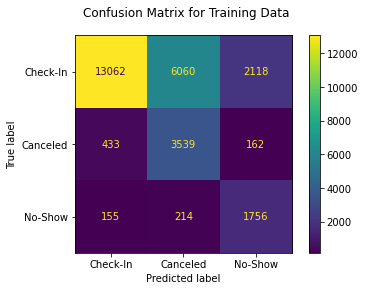

              precision    recall  f1-score   support

    Check-In       0.96      0.61      0.75     21240
    Canceled       0.36      0.86      0.51      4134
     No-Show       0.44      0.83      0.57      2125

    accuracy                           0.67     27499
   macro avg       0.58      0.77      0.61     27499
weighted avg       0.83      0.67      0.70     27499



In [148]:
Y_train_predict = Classifier.predict(X_train)

# print(Classifier.score(Y_train_predict, Y_train))
fig=plot_confusion_matrix(Classifier, X_train,Y_train,
display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_train, Y_train_predict, target_names=target_names))

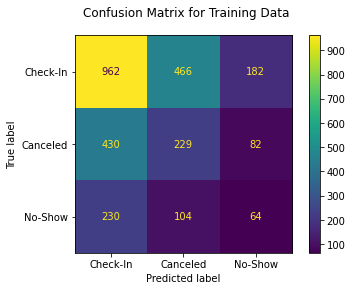

              precision    recall  f1-score   support

    Check-In       0.59      0.60      0.60      1610
    Canceled       0.29      0.31      0.30       741
     No-Show       0.20      0.16      0.18       398

    accuracy                           0.46      2749
   macro avg       0.36      0.36      0.36      2749
weighted avg       0.45      0.46      0.45      2749



In [149]:
X_val = Val_Data.loc[:,Categorical+Continus]
Y_val = Val_Data.loc[:,Label]

Y_val_predict = Classifier.predict(X_val)

# print(Classifier.score(Y_val_predict, Y_val))
fig=plot_confusion_matrix(Classifier, X_val,Y_val,display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_val, Y_val_predict, target_names=target_names))

In [150]:
X_Test = Test_Data.loc[:,Categorical+Continus]
# Y_val = Test_Data.loc[:,Label]

Test_Data_predict = Classifier.predict(X_Test)

Test_Data["Reservation_Status"] = Test_Data_predict

# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(3,'No-Show')
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(2,"Canceled")
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(1,"Check-In")

Submission = Test_Data.loc[:,["Reservation-id","Reservation_Status"]]
Submission.to_csv("Submission Model-2 XGboost.csv",index=False)
Submission

,Reservation-id,Reservation_Status
0,62931593,1
1,70586099,2
2,4230648,1
3,25192322,2
4,80931528,1
...,...,...
4313,39110574,3
4314,5496554,2
4315,59004046,2
4316,65838682,1


In [ ]:
def initilialize_poplulation(numberOfParents):
    learningRate = np.empty([numberOfParents, 1])
    nEstimators = np.empty([numberOfParents, 1], dtype = np.uint8)
    maxDepth = np.empty([numberOfParents, 1], dtype = np.uint8)
    minChildWeight = np.empty([numberOfParents, 1])
    gammaValue = np.empty([numberOfParents, 1])
    subSample = np.empty([numberOfParents, 1])
    colSampleByTree =  np.empty([numberOfParents, 1])
    
    for i in range(numberOfParents):
            print(i)
            learningRate[i] = round(random.uniform(0.01, 1), 2)
            nEstimators[i] = random.randrange(10, 1500, step = 25)
            maxDepth[i] = int(random.randrange(1, 10, step= 1))
            minChildWeight[i] = round(random.uniform(0.01, 10.0), 2)
            gammaValue[i] = round(random.uniform(0.01, 10.0), 2)
            subSample[i] = round(random.uniform(0.01, 1.0), 2)
            colSampleByTree[i] = round(random.uniform(0.01, 1.0), 2)
    
    population = np.concatenate((learningRate, nEstimators, maxDepth, minChildWeight, gammaValue, subSample, colSampleByTree), axis= 1)
    return population


def fitness_f1score(y_true, y_pred):
    fitness = round((f1_score(y_true, y_pred, average='weighted')), 4)
    return fitness


#train the data annd find fitness score
def train_population(population, dMatrixTrain, dMatrixtest, y_test,X,ys):
    fScore = []
    for i in range(population.shape[0]):
        param = { 'objective':'binary:logistic',
              'learning_rate': population[i][0],
              'n_estimators': int(population[i][1]), 
              'max_depth': int(population[i][2]), 
              'min_child_weight': population[i][3],
              'gamma': population[i][4], 
              'subsample': population[i][5],
              'colsample_bytree': population[i][6],
              'seed': 24}
        num_round = 100
        xgbT = xgb.train(param, dMatrixTrain, num_round)
        xgbcv= xgb.XGBClassifier(random_state=1,learning_rate=0.01)
        preds = xgbT.predict(dMatrixtest)
        preds = preds>0.5
        
        classifier=xgb.XGBClassifier(learning_rate=  population[i][0] ,
                    n_estimators= int(population[i][1]) ,
                    max_depth=  int(population[i][2]) ,
                    min_child_weight= population[i][3] ,
                    gamma= population[i][4] ,
                    subsample= population[i][5] ,
                    colsample_bytree= population[i][6])
        cvscore=cross_val_score(classifier,X,y,cv=10)
        p=[]
        for i in cvscore:
            if math.isnan(i):
                p=p
            else:
                p+=[i]
        p=np.array(p)
        p
        fScore.append(sm/cnt)
#         fScore.append(fitness_f1score(y_test, preds))
    return fScore

#select parents for mating
def new_parents_selection(population, fitness, numParents):
    selectedParents = np.empty((numParents, population.shape[1])) #create an array to store fittest parents
    
    #find the top best performing parents
    for parentId in range(numParents):
        bestFitnessId = np.where(fitness == np.max(fitness))
        bestFitnessId  = bestFitnessId[0][0]
        selectedParents[parentId, :] = population[bestFitnessId, :]
        fitness[bestFitnessId] = -1 #set this value to negative, in case of F1-score, so this parent is not selected again
    return selectedParents

In [ ]:
'''
Mate these parents to create children having parameters from these parents (we are using uniform crossover method)
'''
def crossover_uniform(parents, childrenSize):
    
    crossoverPointIndex = np.arange(0, np.uint8(childrenSize[1]), 1, dtype= np.uint8) #get all the index
    crossoverPointIndex1 = np.random.randint(0, np.uint8(childrenSize[1]), np.uint8(childrenSize[1]/2)) # select half  of the indexes randomly
    crossoverPointIndex2 = np.array(list(set(crossoverPointIndex) - set(crossoverPointIndex1))) #select leftover indexes
    
    children = np.empty(childrenSize)
    
    '''
    Create child by choosing parameters from two parents selected using new_parent_selection function. The parameter values
    will be picked from the indexes, which were randomly selected above. 
    '''
    for i in range(childrenSize[0]):
        
        #find parent 1 index 
        parent1_index = i%parents.shape[0]
        #find parent 2 index
        parent2_index = (i+1)%parents.shape[0]
        #insert parameters based on random selected indexes in parent 1
        children[i, crossoverPointIndex1] = parents[parent1_index, crossoverPointIndex1]
        #insert parameters based on random selected indexes in parent 1
        children[i, crossoverPointIndex2] = parents[parent2_index, crossoverPointIndex2]
    return children

In [ ]:
def mutation(crossover, numberOfParameters):
    #Define minimum and maximum values allowed for each parameter
    minMaxValue = np.zeros((numberOfParameters, 2))
    
    minMaxValue[0:] = [0.01, 1.0] #min/max learning rate
    minMaxValue[1, :] = [10, 2000] #min/max n_estimator
    minMaxValue[2, :] = [1, 15] #min/max depth
    minMaxValue[3, :] = [0, 10.0] #min/max child_weight
    minMaxValue[4, :] = [0.01, 10.0] #min/max gamma
    minMaxValue[5, :] = [0.01, 1.0] #min/maxsubsample
    minMaxValue[6, :] = [0.01, 1.0] #min/maxcolsample_bytree
 
    # Mutation changes a single gene in each offspring randomly.
    mutationValue = 0
    parameterSelect = np.random.randint(0, 7, 1)
    print(parameterSelect)
    if parameterSelect == 0: #learning_rate
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
    if parameterSelect == 1: #n_estimators
        mutationValue = np.random.randint(-200, 200, 1)
    if parameterSelect == 2: #max_depth
        mutationValue = np.random.randint(-5, 5, 1)
    if parameterSelect == 3: #min_child_weight
        mutationValue = round(np.random.uniform(5, 5), 2)
    if parameterSelect == 4: #gamma
        mutationValue = round(np.random.uniform(-2, 2), 2)
    if parameterSelect == 5: #subsample
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
    if parameterSelect == 6: #colsample
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
  
    #indtroduce mutation by changing one parameter, and set to max or min if it goes out of range
    for idx in range(crossover.shape[0]):
        crossover[idx, parameterSelect] = crossover[idx, parameterSelect] + mutationValue
        if(crossover[idx, parameterSelect] > minMaxValue[parameterSelect, 1]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 1]
        if(crossover[idx, parameterSelect] < minMaxValue[parameterSelect, 0]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 0]    
    return crossover

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd

import xgboost as xgb
np.random.seed(723)
# Importing the dataset

Train_Data = pd.read_csv('Encoded_Train_Data.csv')
Val_Data = pd.read_csv('Encoded_Val_Data.csv') 
Test_Data = pd.read_csv('Encoded_Test_Data.csv') 

Continus = ['Age','Discount_Rate','Room_Rate','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Features= Categorical+Continus
X=Train_Data.loc[:,Categorical+Continus]
y=Train_Data.loc[:,Label]



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 97)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#XGboost Classifier
#model xgboost
#use xgboost API now
xgDMatrix = xgb.DMatrix(X_train, y_train) #create Dmatrix
xgbDMatrixTest = xgb.DMatrix(X_test, y_test)

In [ ]:
numberOfParents = 8 #number of parents to start
numberOfParentsMating = 4 #number of parents that will mate
numberOfParameters = 7 #number of parameters that will be optimized
numberOfGenerations = 100 #number of genration that will be created
#define the population size
populationSize = (numberOfParents, numberOfParameters)
#initialize the population with randomly generated parameters
population = initilialize_poplulation(numberOfParents)
#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])
#define an array to store the value of each parameter for each parent and generation
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])
#insert the value of initial parameters in history
populationHistory[0:numberOfParents, :] = population
for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    #train the dataset and obtain fitness
    fitnessValue = train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest,
                                    y_test=y_test,X=X,ys=y)
    fitnessHistory[generation, :] = fitnessValue
    
    #best score in the current iteration
    print('Best F1 score in the this iteration = {}'.format(np.max(fitnessHistory[generation, :])))
#survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    
    #add mutation to create genetic diversity
    children_mutated = mutation(children, numberOfParameters)
    
    '''
    We will create new population, which will contain parents that where selected previously based on the
    fitness score and rest of them  will be children
    '''
    population[0:parents.shape[0], :] = parents #fittest parents
    population[parents.shape[0]:, :] = children_mutated #children
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information